In [4]:
import pandas as pd
import plotly.express as px

In [5]:
url = "https://www.alessandrobramucci.com/gapminder.csv"

df = pd.read_csv(url)

df.to_csv("data/gapminder.csv")

In [20]:
df_p1 = pd.DataFrame({
    "Minimum": df.groupby("year")["lifeExp"].min(),
    "Maximum": df.groupby("year")["lifeExp"].max(),
    "Median": df.groupby("year")["lifeExp"].median()
}).reset_index()
df_p1

,year,Minimum,Maximum,Median
0,1952,28.801,72.670,45.1355
1,1957,30.332,73.470,48.3605
2,1962,31.997,73.680,50.8810
3,1967,34.020,74.160,53.8250
4,1972,35.400,74.720,56.5300
5,1977,31.220,76.110,59.6720
6,1982,38.445,77.110,62.4415
7,1987,39.906,78.670,65.8340
8,1992,23.599,79.360,67.7030
9,1997,36.087,80.690,69.3940


In [15]:
df_p2 = df[df["country"] == "United States"][["year", "lifeExp"]].rename(columns = {"lifeExp": "United States"})
df_p2.head()

,year,United States
1608,1952,68.44
1609,1957,69.49
1610,1962,70.21
1611,1967,70.76
1612,1972,71.34


In [16]:
df_graph = df_p1.merge(df_p2, how = "inner", on = "year")
df_graph.head()

,year,Minimum,Maximum,Median,United States
0,1952,28.801,72.67,45.1355,68.44
1,1957,30.332,73.47,48.3605,69.49
2,1962,31.997,73.68,50.8810,70.21
3,1967,34.020,74.16,53.8250,70.76
4,1972,35.400,74.72,56.5300,71.34


# From wide to long
 - aaaa
 - bbbb
 - cccc

In [18]:
df_graph_long = pd.melt(
    df_graph,
    id_vars = "year",
    var_name = "variable",
    value_name = "value"
)

df_graph_long.head()

,year,variable,value
0,1952,Minimum,28.801
1,1957,Minimum,30.332
2,1962,Minimum,31.997
3,1967,Minimum,34.020
4,1972,Minimum,35.400


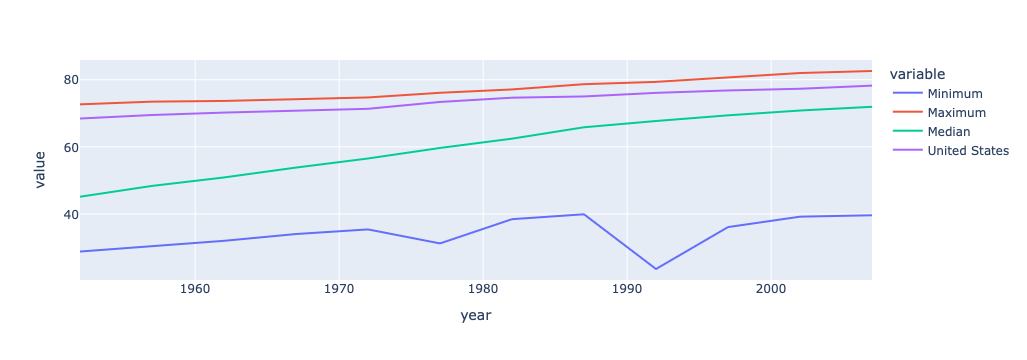

In [19]:
px.line(df_graph_long,
        x = "year",
        y = "value",
        color = "variable")